# **Guided Project: Predicting Listing Gains in the Indian IPO Market Using TensorFlow**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## **Loading the Data**

In [2]:
df = pd.read_csv('Indian_IPO_Market_Data.csv')
print(df.shape)
df.head()

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [3]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


## **Exploring the Data**

In [7]:
df["Listing_Gains_Profit"]=(df["Listing_Gains_Percent"] > 0).astype(int)

In [11]:
df.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64

In [13]:
df["Listing_Gains_Profit"].value_counts()

Listing_Gains_Profit
1    174
0    145
Name: count, dtype: int64

In [12]:
df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 16.3 KB


## **Data Visualization**

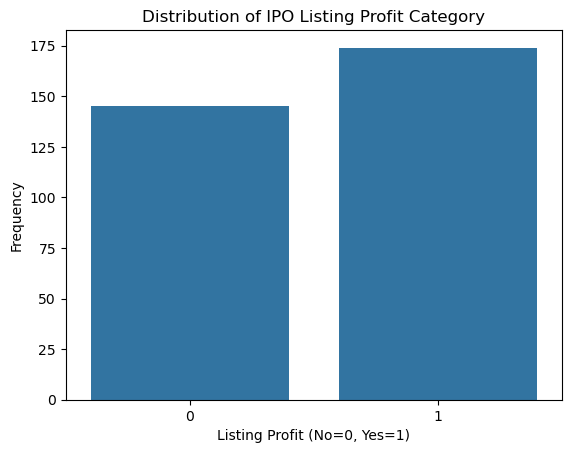

In [16]:
sns.countplot(x='Listing_Gains_Profit', data=df)
plt.title('Distribution of IPO Listing Profit Category')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.ylabel('Frequency')
plt.show()

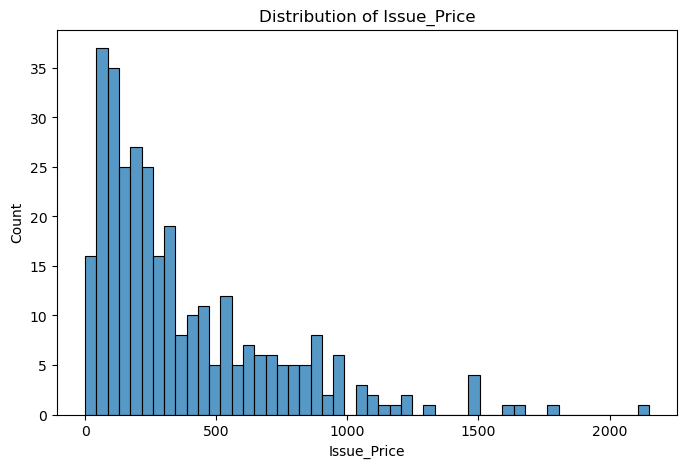

In [17]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

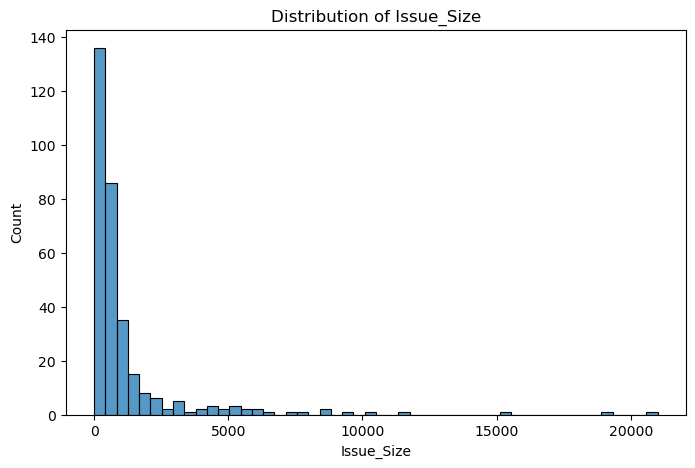

In [18]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Size', bins=50).set(title='Distribution of Issue_Size', ylabel='Count')
plt.show()

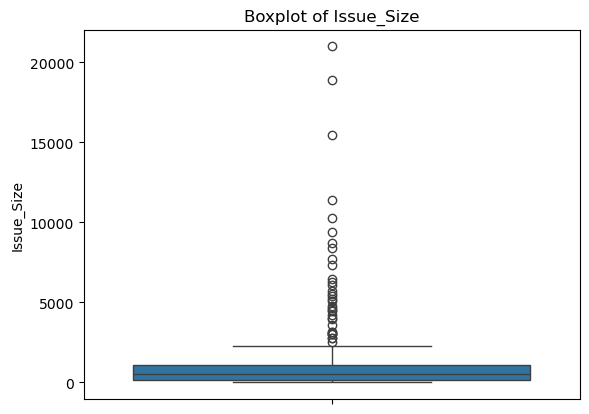

In [19]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

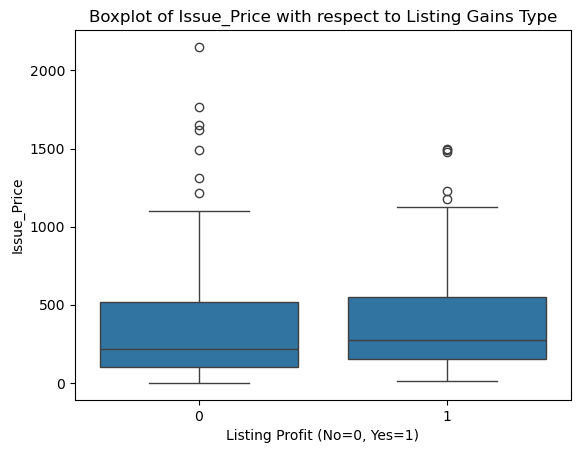

In [20]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

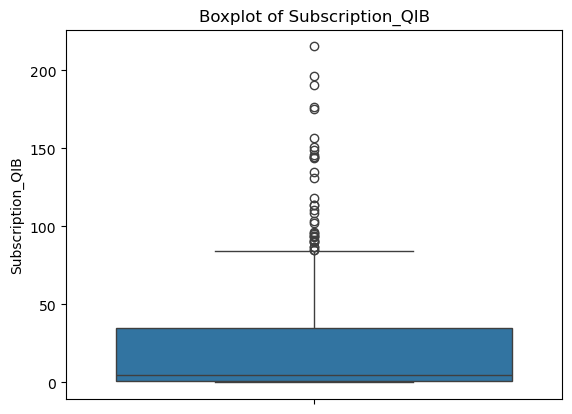

In [21]:
sns.boxplot(data=df, y='Subscription_QIB')
plt.title('Boxplot of Subscription_QIB')
plt.show()

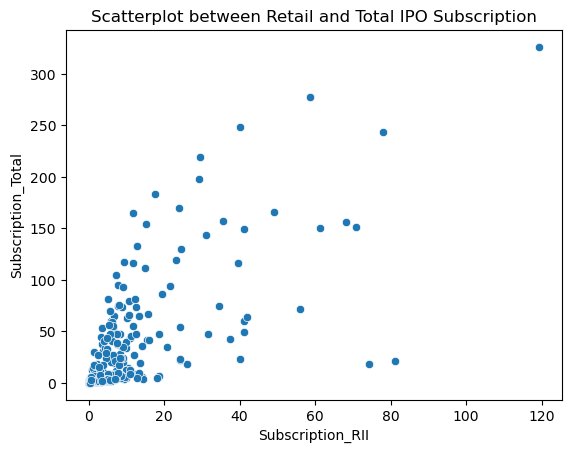

In [22]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.title('Scatterplot between Retail and Total IPO Subscription')
plt.show()

## **Here are some of the findings that we can draw from the visualizations above:**

- The histogram and the boxplots show that outliers are present in the data and might need outlier treatment.

- The boxplot of Issue_Price, with respect to Listing_Gains_Profit, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit.

- We also observed a correlation between Retail and Total IPO Subscription via a scatterplot. You can check for correlations between other continuous variables as well.

## **Outlier Treatment**

Since there are outliers in the data, we need to treat them. However, feel free to use a different approach or choose to work with outliers. 

In [23]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

IQR = 930.995
lower = -1227.4875000000002
upper = 2496.4925000000003


count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64

In [24]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

IQR = 33.48500000000001
lower = -49.07750000000001
upper = 84.86250000000001


count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64

In [25]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

IQR = 60.839999999999996
lower = -90.005
upper = 153.355


count    319.000000
mean      40.356426
std       57.427921
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      153.355000
Name: Subscription_HNI, dtype: float64

In [26]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

IQR = 7.33
lower = -9.72
upper = 19.6


count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000
Name: Subscription_RII, dtype: float64

In [27]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

IQR = 31.749999999999996
lower = -45.97999999999999
upper = 81.01999999999998


count    319.000000
mean      20.456646
std       27.217740
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max       81.020000
Name: Subscription_Total, dtype: float64

## **Setting the Target and Predictor Variables**

In [28]:
target_variable = ['Listing_Gains_Profit'] 
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have created an object of the dependent variable called target_variable and also a list of all the features, excluding the target variable Listing_Gains_Profit. During data exploration, we observed that the distribution of the variables differed significantly. This could influence the modeling process, so to prevent this, we performed normalization by scaling the predictors. You can see that the normalized values of the predictors lie between 0 and 1.

## **Creating the Holdout Validation Approach**

In [29]:
X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(223, 6)
(96, 6)


## **Define the Deep Learning Classification Model**

In this step, we have defined the model by instantiating the sequential model class in TensorFlow's Keras. The model architecture is comprised of four hidden layers with relu as the activation function. The output layer uses a sigmoid activation function, which is a good choice for a binary classification model.

In [30]:
# define model
tf.random.set_seed(100)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    

c:\Users\jruiz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile and Train the model**

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [32]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4760 - loss: 0.6956
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5005 - loss: 0.6932 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5489 - loss: 0.6923 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 0.6919 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5535 - loss: 0.6916 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5583 - loss: 0.6912 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5517 - loss: 0.6908 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5469 - loss: 0.6904 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5649 - loss: 0.6899 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5598 - loss: 0.6895 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5637 - loss: 0.6890 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5565 - loss

## **Model Evaluation**

he model evaluation output shows the performance of the model on both training and test data. The accuracy was approximately 73% on the training data and 69% on the test data. Ideally, the higher the accuracy value, the better the model is performing. It's noteworthy that the training and test set accuracies are close to each other, which shows that there is consistency and that the accuracy doesn't drop too much when we test the model on unseen data.

In [34]:
model.evaluate(X_train, y_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7252 - loss: 0.5704  


[0.5591784715652466, 0.7309417128562927]

In [35]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6615 - loss: 0.6119


[0.5946625471115112, 0.6979166865348816]

## **Iteration**

1. Hyperparameter Optimization: tuning the hyperparameters like learning rate, number of layers, etc., is important for finding the optimal configuration of the deep learning model. Try to tune the hyperparameters and examine the changes in the model accuracy.

2. Optimizers and Loss Functions: you can use different optimizers and loss functions to see which one improves the model performance.

3. Features: instead of using the base predictors in the data, try to construct new features that might help improve the model's predictive ability.

4. Performance Metrics: instead of using accuracy as the performance metric, you may try other performance metrics to see if that helps guide the model toward better results.

5. Domain Specific Knowledge: using domain specific knowledge to adjust your model can further enhance its performance and accuracy.

In [48]:
# define model
tf.random.set_seed(100)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4096, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(2048, activation= 'relu'))
model.add(tf.keras.layers.Dense(1024, activation= 'relu'))
model.add(tf.keras.layers.Dense(512, activation= 'relu'))
model.add(tf.keras.layers.Dense(256, activation= 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dense(32, activation= 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    


model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50)

print(model.evaluate(X_train, y_train))

print(model.evaluate(X_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.4934 - loss: 1.6053
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5217 - loss: 0.7176
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5759 - loss: 0.6560
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6151 - loss: 0.6523
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5967 - loss: 0.6421
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5271 - loss: 0.6905
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4760 - loss: 0.6946
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4839 - loss: 0.6931
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6445 - loss: 0.6918
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5240 - loss: 0.6920
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5240 - loss: 0.6918
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5240 - loss: 0.691